```mermaid
graph TD
    A[Decision Tree<br>决策树] --最大化分类纯度--> B[Classification Tree<br>分类树]
    A --最小化连续值的预测误差(MSE等等)--> C[Regression Tree<br>回归树]
    
```

分类树

In [ ]:
# 这几行代码不运行 这是一个模型分类拟合示例
from sklearn import tree
clf = tree.DecisionTreeClassifier()         #实例化
clf = clf.fit(x_train, y_train)             #用训练集数据训练模型
result = clf.score(x_test, y_test)          #导入测试集，从接口中调用需要的信息


```mermaid
flowchart TD
A[计算全部特征的不纯度指标]-->B[选取不纯度指标最优的特征来分枝]
B-->C[在第一个特征的分枝下，计算全部特征的不纯度指标]
C-->D[选取不纯度指标最优的特征继续分枝]
```


In [ ]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine() #是一个字典

In [ ]:
#wine.data.shape

In [ ]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

In [ ]:
#wine.feature_names

In [ ]:
#wine.target_names

In [ ]:
# 分为训练集and测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target,test_size=0.3)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
# criterion：节点的不纯度，不纯度越低，模型的拟合效果就越好，具体选择信息熵/基尼系数 
# 过拟合的时候最好不要选择entropy 
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

In [ ]:
#画树
feature_name =['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_date = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["aaa","vvv","xxx"]
                                ,filled=True                                # 填充颜色
                                ,rounded=True)                              # 圆角
graph = graphviz.Source(dot_date)
graph


In [ ]:
# 从画出的树中可以看出没有用所有特征，那么我们怎么看每个特征分别作出了多大的贡献呢
clf.feature_importances_

In [ ]:
[*zip(feature_name, clf.feature_importances_)]

决策树在分枝的本质上是追求不纯度指标的优化，我们用同样的训练集测试集跑出来的score不同。  
既然一棵树不能保证最优，那就用许多不同单刷，然后从中选择最好的。  
那么怎么样从一组数据集中建不同的树呢？在每次分枝时，不使用全部的特征，而是随机选取一部分，从中选取不纯度相关指标最优的作为分枝用的节点。也就是每次生成的树不同。

In [ ]:
clf =  tree.DecisionTreeClassifier(criterion='entropy'
                                   ,random_state=0
                                   ,splitter='random')
# random_state是设置分枝中随机模式的参数，在高纬度时随机性会表现的更较明显，输入一个整数会长出同一棵树
# splitter 输入best:随机树会选择最重要的fea来进行分枝；random：随机数分枝会更加随机，树会更深，对训练集的拟合将会降低
# 当观测到模型过拟合时，可以用这两个参数来帮助降低过拟合
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print(score)

#画树
feature_name =['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_date = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["aaa","vvv","xxx"]
                                ,filled=True                                # 填充颜色
                                ,rounded=True)                              # 圆角
graph = graphviz.Source(dot_date)
graph

In [ ]:
# 剪枝
# 可能决策树在训练集上表现很好，但在测试集表现糟糕
# 下面这段代码看在我们上面生成那棵树对测试集的拟合效果
score_train = clf.score(Xtrain, Ytrain)
score_train
# 1.0 非常完美，在训练集比测试集上表现好
# 为了有更好的泛化性，我们要进行剪枝

In [ ]:

clf =  tree.DecisionTreeClassifier(criterion='entropy'
                                   ,random_state=15
                                   ,splitter='random'
                                   ,max_depth=3
                                   ,min_samples_leaf=10
                                   ,min_samples_split=25)
# random_state是设置分枝中随机模式的参数，在高纬度时随机性会表现的更较明显，输入一个整数会长出同一棵树
# splitter 输入best:随机树会选择最重要的fea来进行分枝；random：随机数分枝会更加随机，树会更深，对训练集的拟合将会降低
# 当观测到模型过拟合时，可以用这两个参数来帮助降低过拟合
# max_depth 树最大深度 建议从=3开始尝试 在高纬度低样本量时非常有效
# min_samlpes_leaf 限定一个节点在分之后每个子节点都要有k个样本，可以让模型更加平滑，建议从5开始，对于类别不多的分类问题，=1即可
# min_samples_leaf  可以输入浮点数作为百分比
#  min_sample_split 限定一个节点要有k个样本，才被允许分枝
# max_features 在高纬度时限制过拟合 直接限制使用的特征数量 建议利用pca ica
# min_imputity_decrease 限制信息增益的大小，信息增益小于设定数值的分枝不会发生
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print(f'针对测试集的分数：{score}')

score_train = clf.score(Xtrain, Ytrain)
print(f'针对训练集的分数：{score_train}')

#画树
feature_name =['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_date = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["aaa","vvv","xxx"]
                                ,filled=True                                # 填充颜色
                                ,rounded=True)                              # 圆角
graph = graphviz.Source(dot_date)
graph


In [ ]:
'''
如何确认最佳的剪枝参数
使用确定超参数的曲线判断。这是一条以超参数的取值为横坐标，模型scpre为纵坐标的曲线
'''
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)

plt.plot(range(1,11), test, label='max_depth')
plt.legend()
plt.show()
'''
剪枝参数并不一定可以增加模型的打分
'''


目标权重参数  
这个参数使用较少  
$\cdot$ class_weight 当数据集不均衡（是否犯罪），用这个来给少量的标签更多的权重  
$\cdot$ min_weight_fraction_leaf 基于权重的剪枝  


In [ ]:
# apply 返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)
# predict 返回每个测试样本的的分类/回归结果
clf.predict(Xtest)
# 这两个都是只输入测试集的特征，不需要标签

决策树总结：  
fit, score, apply, predict

回归树：处理连续型变量


criterion: 
mse均方误差，使用叶子节点的均值来最小化L2损失
friedman_mse
mae 使用叶节点的均值来最小化L1损失
回归树的接口score返回的是R^2
note sklearn自动使用负均方误差


交叉验证（CV：  
将数据划分为n份，选一份做测试集，剩下n-1份做为训练集，看平均的效果
cross_val_score(regressor, boston.data, boston.target, cv = 10)


In [ ]:
from sklearn.datasets import fetch_california_housing	
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [70]:
cali = fetch_california_housing()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, cali.data, cali.target, cv = 5
               ,scoring="neg_mean_squared_error"
               )

array([-0.80269142, -0.7223308 , -0.78878483, -0.90816088, -0.86581756])

In [ ]:
# fetch_california_housing

一维回归拟合曲线

In [71]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.RandomState(1)
# 80个0-5的点，并升序排列
X = np.sort(5 * rng.rand(80,1), axis = 0)
# 正弦函数加噪声，每5个点加一次噪声
y = np.sin(X).ravel() # ravel()降维函数
y[::5] += 3 * (0.5 - rng.rand(16)) # 噪声为-1.5 - 1.5

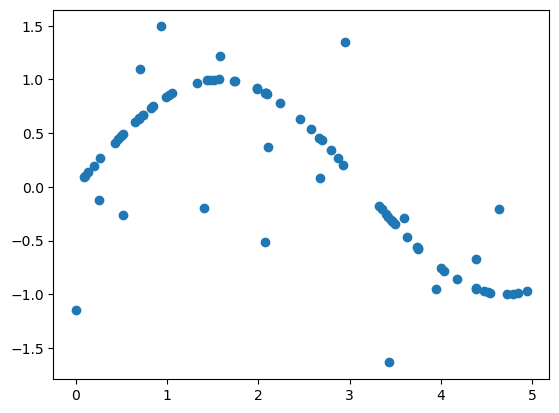

In [ ]:
# plt.figure()
# plt.scatter(X,y)

In [74]:
reg1 = DecisionTreeRegressor(max_depth=2)
reg2 = DecisionTreeRegressor(max_depth=5)
reg1.fit(X, y)
reg2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [ ]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]# newaxis 增维

In [76]:
y1 = reg1.predict(X_test)
y2 = reg2.predict(X_test)

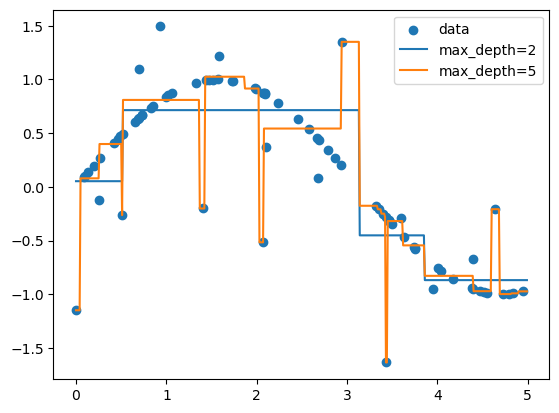

In [77]:
plt.figure()
plt.scatter(X,y, label = "data")
plt.plot(X_test, y1, label = "max_depth=2")
plt.plot(X_test, y2, label = "max_depth=5")
plt.legend()
plt.show()